
# Installing Packages & Attaching Library

In [ ]:
library(tidyverse)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
install.packages("gtools", repos="https://cran.rstudio.com/")
install.packages("gmodels", repos="https://cran.rstudio.com/")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdata’




In [ ]:
install.packages("caret", repos="https://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("rmdformats", repos="https://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bookdown’




In [ ]:
library(dplyr)
library(gtools)
library(gmodels)
library(ggplot2)
library(class)
library(tidyr)
library(lattice)
library(rmdformats)
library(caret)



Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# Explore Dataset



In [ ]:
#Data Import
heart <- read.csv("heart.csv")
dim(heart)

[1] 303  14

In [ ]:
# Overview of Data
glimpse(heart)

Rows: 303
Columns: 14
$ age      <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5…
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1…
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0…
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1…
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2…
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1…
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1…
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0…
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1…
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0…
$ thal     <int> 1

In [ ]:
head(heart, 3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


# Data Wrangling

In [ ]:
heart <- heart %>%
  #mutate_if(is.integer, as.factor) %>%
  mutate(cp = as.factor(cp),
         restecg = as.factor(restecg),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         sex = factor(sex, levels = c(0,1), labels = c("female", "male")),
         fbs = factor(fbs, levels = c(0,1), labels = c("False", "True")),
         exang = factor(exang, levels = c(0,1), labels = c("No", "Yes")),
         target = factor(target, levels = c(0,1), labels = c("Health", "Not Health")))

glimpse(heart)

Rows: 303
Columns: 14
$ age      <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5…
$ sex      <fct> male, male, female, male, female, male, female, male, male, m…
$ cp       <fct> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0…
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1…
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2…
$ fbs      <fct> True, False, False, False, False, False, False, False, True, …
$ restecg  <fct> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1…
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1…
$ exang    <fct> No, No, No, No, Yes, No, No, No, No, No, No, No, No, Yes, No,…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0…
$ slope    <fct> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1…
$ ca       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0…
$ thal     <fct> 1

In [ ]:
colSums(is.na(heart))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

# Data Pre-Processing

In [ ]:
prop.table(table(heart$target))


    Health Not Health 
 0.4554455  0.5445545 

In [ ]:
table(heart$target)


    Health Not Health 
       138        165 

We can see that our proportion is balance enough, and we do not need to balancing the class by using down sample or up sample method.

# Data Visualisation


Warning message:
“Use of `heart$target` is discouraged. Use `target` instead.”
Warning message:
“Use of `heart$target` is discouraged. Use `target` instead.”


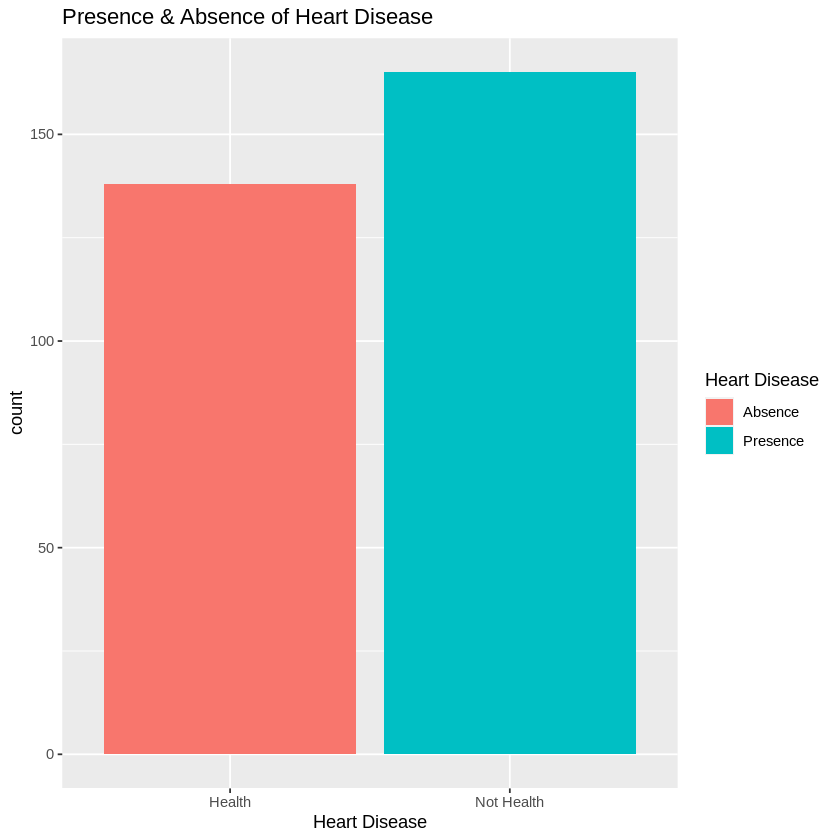

In [ ]:
ggplot(heart, aes(x=heart$target, fill=heart$target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")+
   scale_fill_discrete (name= 'Heart Disease', labels=c("Absence", "Presence"))

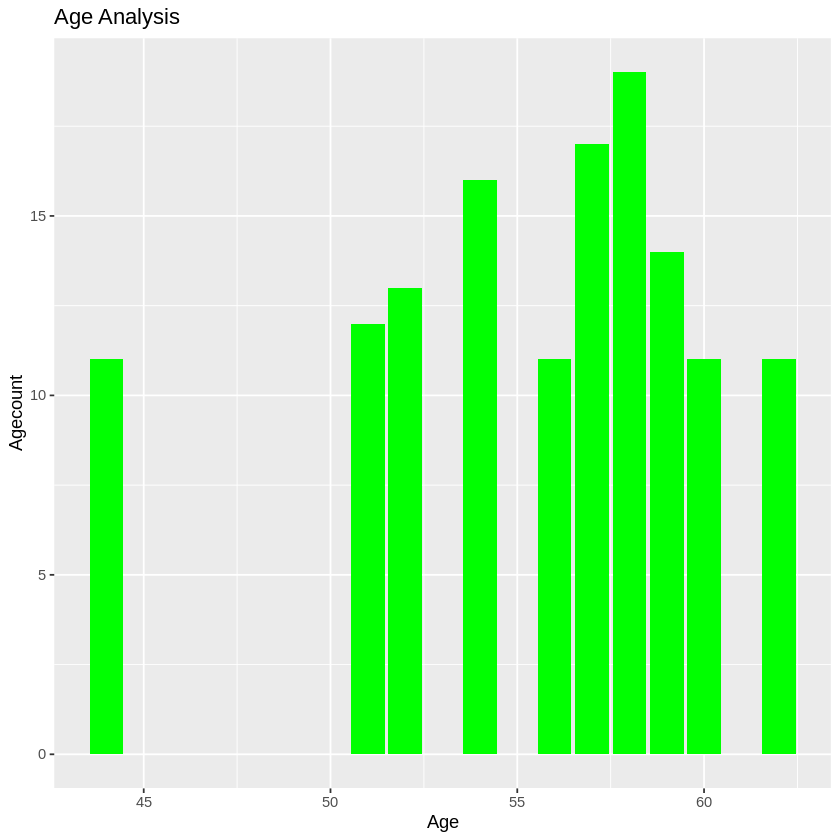

In [ ]:
# count the frequency of the values of age
heart  %>%
     group_by (age)  %>%
     count()  %>%
     filter(n>10)  %>%
     ggplot()+
     geom_col(aes(age, n), fill ='green')+ 
     ggtitle("Age Analysis")+
     xlab("Age")+
     ylab("Agecount")

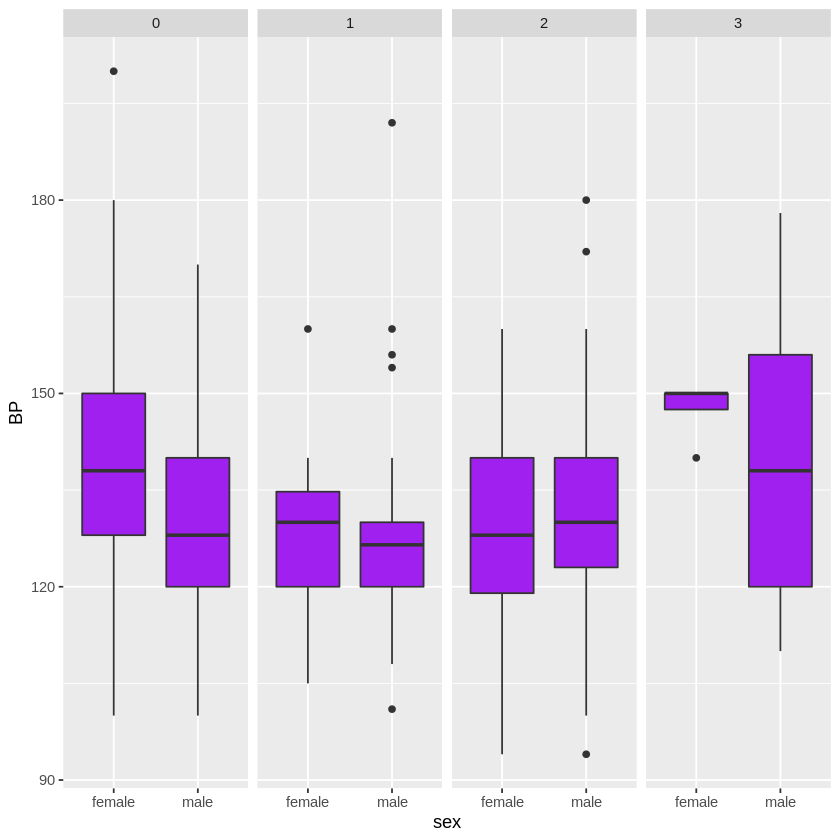

In [ ]:
# comapre blood pressure across the chest pain

heart %>%
  ggplot (aes (x=sex, y=trestbps))+
  geom_boxplot (fill ='purple')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)

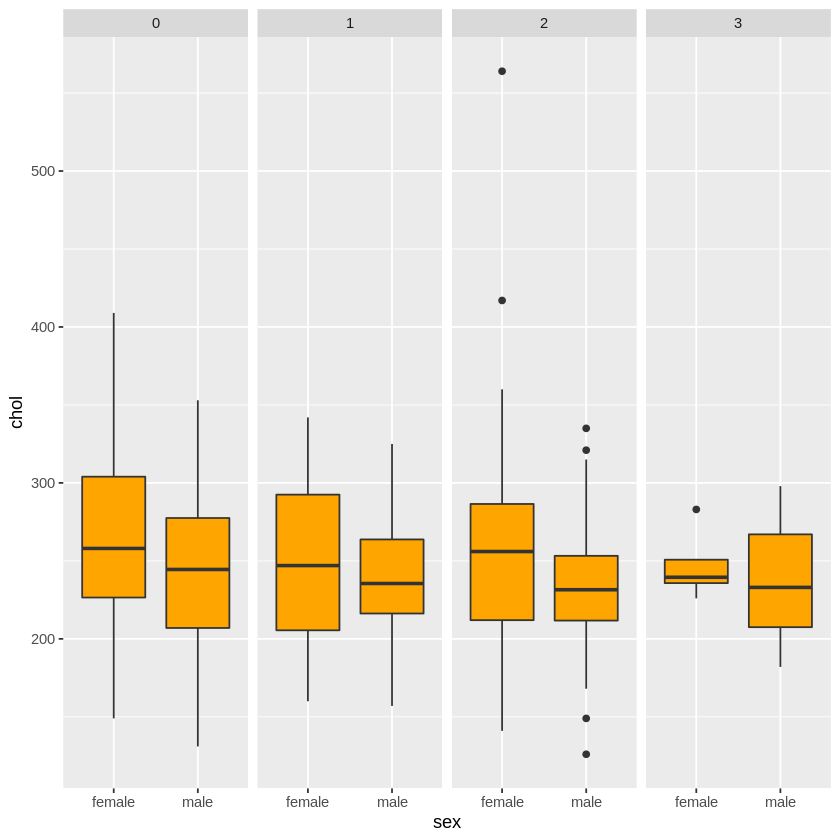

In [ ]:
 #comapre cholestrol across the chest pain

heart %>%
  ggplot (aes (x=sex, y=chol))+
  geom_boxplot (fill ='orange')+
  xlab('sex')+
  ylab('chol')+
  facet_grid(~cp)

# Cross Validation

Next step of our analysis will be splitting our data into train and test data. We will use our train data to train our model and use our test data to validate our model when overcoming the unseen data.

In [ ]:
set.seed(100)
index <- sample(nrow(heart), nrow(heart)*0.7)

# Data train
train_heart <- heart[index,]

# Data test
test_heart <- heart[-index,]

Next, we will check our train data proportion whether the proportion is balance enough to train our model, this need to be done so we can minimize the risk that our models are overfit.

In [ ]:
prop.table(table(train_heart$target))


    Health Not Health 
 0.4575472  0.5424528 

# Modelling

We will create a model based on our train data. we will use several variables that may have a significant effect toward our target variable like sex, cp, fbs, and thal.

Then we will also use the stepwise method to see if we can get a better model than our previous one

In [ ]:
# Create a model
model1 <- glm(formula = target ~ sex + cp +  fbs + thal, family = "binomial", data = train_heart)

# Model summary
summary(model1)


Call:
glm(formula = target ~ sex + cp + fbs + thal, family = "binomial", 
    data = train_heart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5494  -0.6195   0.2813   0.6259   2.1699  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.42390    1.89429  -0.224 0.822931    
sexmale     -1.00808    0.46155  -2.184 0.028955 *  
cp1          2.63834    0.58159   4.536 5.72e-06 ***
cp2          1.96708    0.43148   4.559 5.14e-06 ***
cp3          2.65973    0.75439   3.526 0.000422 ***
fbsTrue     -0.11120    0.55873  -0.199 0.842244    
thal1       -0.01373    1.99362  -0.007 0.994505    
thal2        0.99582    1.89198   0.526 0.598653    
thal3       -0.71130    1.89910  -0.375 0.708000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 292.36  on 211  degrees of freedom
Residual deviance: 188.77  on 203  degrees of freedom
AIC: 206

as we can see, there are only several variables that are significant toward our model. As we have not try other variable that may have been affected our target variable, we will try to use stepwise method to create a better model than our previous one.

In [ ]:
# Create a model without predictor
model_none <- glm(target ~ 1, family = "binomial", data = train_heart)

# Create a model with all predictor
model_all <- glm(target ~ ., family = "binomial", data = train_heart)

In [ ]:
# Stepwise regression backward
model_back <- step(object = model_all, direction = "backward", trace = F)

# Stepwise regression forward
model_forw <- step(object = model_all, scope = list(lower = model_none, upper = model_all), direction = "forward", trace = F)

# Stepwise regression both
model_both <- step(object = model_all, scope = list(lower = model_none, upper = model_all), direction = "both", trace = F)

Next we will see our model summary in each of the model that we have been created before.

We will see it based on:

AIC, amount of information lost in the model, lower AIC indicate a good quality of a model.
Residual Deviance, Error of the model when the model have a predictor, lower Residual Deviance means we have a better model

In [ ]:
# Model Summary

# Backward

summary(model_back)


Call:
glm(formula = target ~ sex + cp + trestbps + restecg + slope + 
    ca + thal, family = "binomial", data = train_heart)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.00360  -0.31563   0.08544   0.38932   2.80515  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.14771    3.54773   0.324 0.746311    
sexmale     -1.94702    0.66841  -2.913 0.003581 ** 
cp1          1.82245    0.68720   2.652 0.008002 ** 
cp2          2.16193    0.57076   3.788 0.000152 ***
cp3          3.67871    0.96664   3.806 0.000141 ***
trestbps    -0.02357    0.01392  -1.693 0.090392 .  
restecg1     0.89406    0.48413   1.847 0.064786 .  
restecg2    -1.34017    1.93060  -0.694 0.487574    
slope1       0.33531    1.02241   0.328 0.742943    
slope2       2.29316    1.05204   2.180 0.029278 *  
ca1         -2.24324    0.58867  -3.811 0.000139 ***
ca2         -3.54535    0.95429  -3.715 0.000203 ***
ca3         -1.84653    0.91095  -2.027 0.042

In [ ]:
# Forward

summary(model_forw)


Call:
glm(formula = target ~ age + sex + cp + trestbps + chol + fbs + 
    restecg + thalach + exang + oldpeak + slope + ca + thal, 
    family = "binomial", data = train_heart)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.97383  -0.26792   0.09287   0.42050   2.90599  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.698162   4.308864   0.162 0.871283    
age          0.037131   0.031962   1.162 0.245360    
sexmale     -2.024142   0.722806  -2.800 0.005104 ** 
cp1          1.269686   0.744520   1.705 0.088125 .  
cp2          1.793341   0.615266   2.915 0.003560 ** 
cp3          3.422971   1.031057   3.320 0.000901 ***
trestbps    -0.027117   0.015591  -1.739 0.081984 .  
chol        -0.005909   0.006067  -0.974 0.330050    
fbsTrue      0.255722   0.763957   0.335 0.737826    
restecg1     0.945576   0.502120   1.883 0.059678 .  
restecg2    -0.960831   3.051418  -0.315 0.752853    
thalach      0.009953   0.014681  

In [ ]:
# Both

summary(model_both)


Call:
glm(formula = target ~ sex + cp + trestbps + restecg + slope + 
    ca + thal, family = "binomial", data = train_heart)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.00360  -0.31563   0.08544   0.38932   2.80515  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.14771    3.54773   0.324 0.746311    
sexmale     -1.94702    0.66841  -2.913 0.003581 ** 
cp1          1.82245    0.68720   2.652 0.008002 ** 
cp2          2.16193    0.57076   3.788 0.000152 ***
cp3          3.67871    0.96664   3.806 0.000141 ***
trestbps    -0.02357    0.01392  -1.693 0.090392 .  
restecg1     0.89406    0.48413   1.847 0.064786 .  
restecg2    -1.34017    1.93060  -0.694 0.487574    
slope1       0.33531    1.02241   0.328 0.742943    
slope2       2.29316    1.05204   2.180 0.029278 *  
ca1         -2.24324    0.58867  -3.811 0.000139 ***
ca2         -3.54535    0.95429  -3.715 0.000203 ***
ca3         -1.84653    0.91095  -2.027 0.042

Based on the result, we can see that our model_back and model_both have a similar value of AIC & Residual Deviance. Both of those model have the AIC value 161.71 and the Residual deviance value 127.71. while our model_forw have the AIC value 168.15 and the Residual deviance value 122.15.

Although our model_forw have a better Residual Deviance than other model, the number of variables that significant towards the our target variables are not as much as the other two models. Therefore, we will not choose model_forw and proceed to choose either the model_back or model_both.

In this case we will choose model_both for our further analysis.

# Prediction

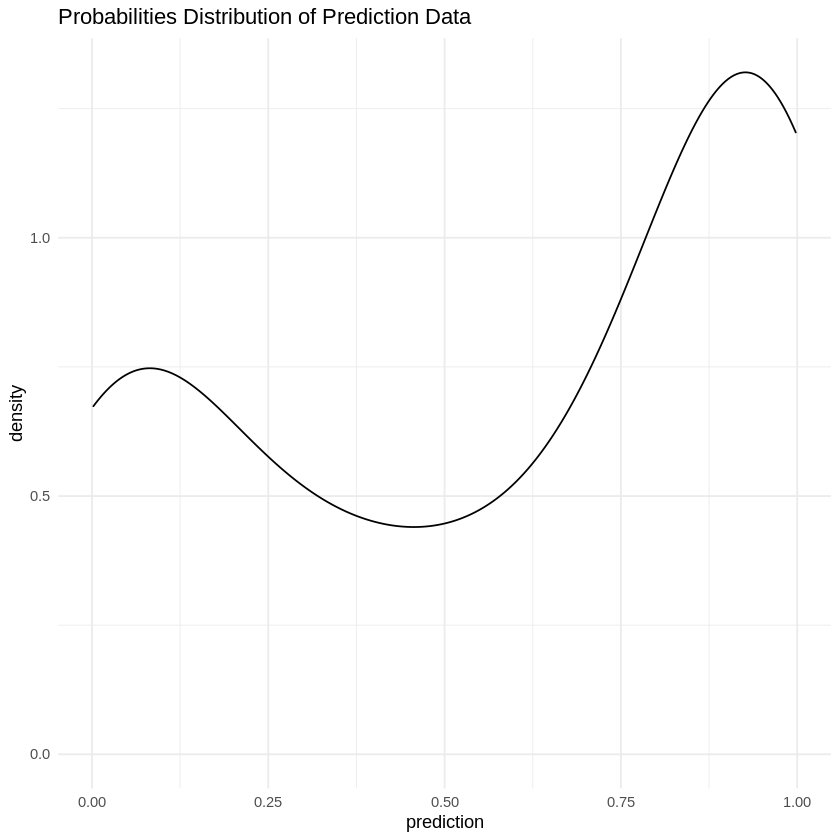

In [ ]:
test_heart$prediction <-  predict(model_both, type = "response", newdata = test_heart)

# Create Plot

test_heart %>%
  ggplot(aes(x=prediction)) +
  geom_density() +
  labs(title = "Probabilities Distribution of Prediction Data") +
  theme_minimal()

In [ ]:
pred <- predict(model_both, type = "response", newdata = test_heart)

In [ ]:
result_pred <- ifelse(pred >= 0.5, "Not Health", "Health")

# Put our result prediction into our test data

test_heart$prediction <- result_pred

Here are the overview comparison between our prediction data and the target variable of our test data

In [ ]:
test_heart %>%
  select(target, prediction) %>%
  head(5)

,target,prediction
,<fct>,<chr>
6,Not Health,Health
10,Not Health,Not Health
17,Not Health,Not Health
18,Not Health,Not Health
21,Not Health,Health


# Model Evalution

LOGISTIC REGRESSION


In [ ]:
conf_mat <- confusionMatrix(as.factor(result_pred), reference = test_heart$target, positive = "Not Health")

conf_mat


Confusion Matrix and Statistics

            Reference
Prediction   Health Not Health
  Health         30          4
  Not Health     11         46
                                          
               Accuracy : 0.8352          
                 95% CI : (0.7427, 0.9047)
    No Information Rate : 0.5495          
    P-Value [Acc > NIR] : 7.843e-09       
                                          
                  Kappa : 0.6619          
                                          
 Mcnemar's Test P-Value : 0.1213          
                                          
            Sensitivity : 0.9200          
            Specificity : 0.7317          
         Pos Pred Value : 0.8070          
         Neg Pred Value : 0.8824          
             Prevalence : 0.5495          
         Detection Rate : 0.5055          
   Detection Prevalence : 0.6264          
      Balanced Accuracy : 0.8259          
                                          
       'Positive' Class : Not Healt

In [ ]:
recall <- round(46/(46+4),3)
specificity <- round(30/(30+11),3)
precision <- round(46/(46+11),3)
accuracy <- round((46+30)/(46+30+11+4),3)

matrix <- cbind.data.frame(accuracy, recall, specificity, precision)

matrix

accuracy,recall,specificity,precision
<dbl>,<dbl>,<dbl>,<dbl>
0.835,0.92,0.732,0.807


Based on the matrix summary, we can see that the ability of our model to predict our target variable are 83.5%. from entire of our prediction data. Our model ability to correctly predicted the Not Health person is 92%, while it ability to correctly predicted the Health person is 73.2%. Furthermore, from all of Not Health prediction our model able to predict it correctly 80.7%

Decision Tree

In [ ]:
install.packages("rpart", repos="https://cran.rstudio.com/")
install.packages("rpart.plot", repos="https://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



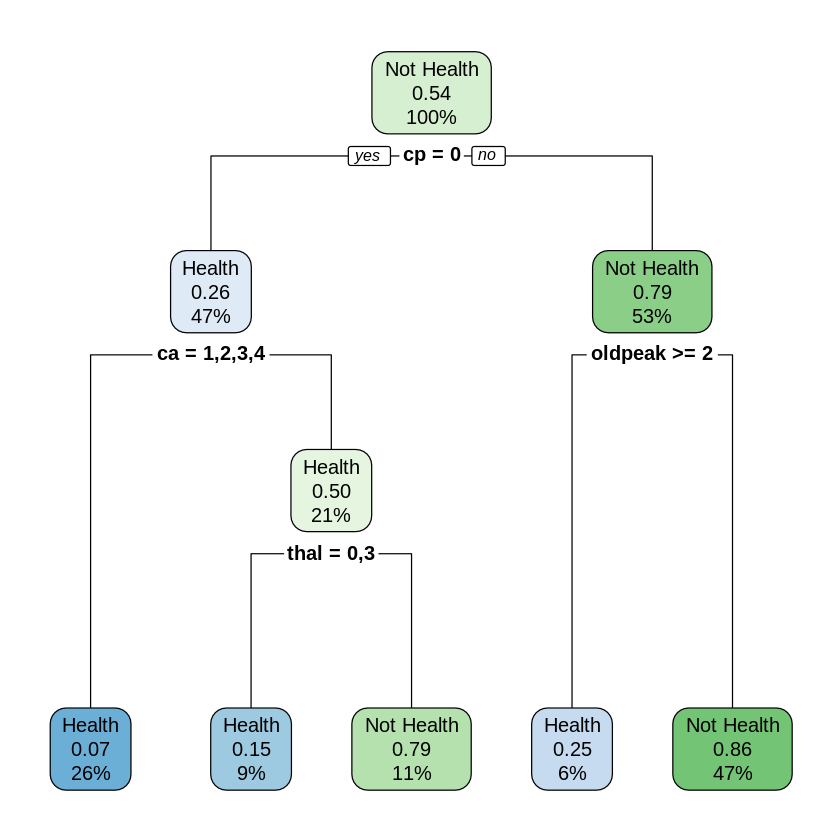

In [ ]:
library(rpart)#for rpart decision tree
library(rpart.plot)#for visualising the tree
model.tree<-rpart(target~.,data = train_heart)
rpart.plot(model.tree)

In [ ]:
confusionMatrix(as.factor(predict(model.tree,newdata = test_heart, type = 'class')),test_heart$target)

Confusion Matrix and Statistics

            Reference
Prediction   Health Not Health
  Health         28          6
  Not Health     13         44
                                          
               Accuracy : 0.7912          
                 95% CI : (0.6933, 0.8694)
    No Information Rate : 0.5495          
    P-Value [Acc > NIR] : 1.303e-06       
                                          
                  Kappa : 0.5717          
                                          
 Mcnemar's Test P-Value : 0.1687          
                                          
            Sensitivity : 0.6829          
            Specificity : 0.8800          
         Pos Pred Value : 0.8235          
         Neg Pred Value : 0.7719          
             Prevalence : 0.4505          
         Detection Rate : 0.3077          
   Detection Prevalence : 0.3736          
      Balanced Accuracy : 0.7815          
                                          
       'Positive' Class : Health   

Random Forest

In [ ]:
install.packages("randomForest", repos="https://cran.rstudio.com/")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
model.rf<-randomForest(target~., train_heart, importance = T, ntree=500)

In [ ]:
print('Random Forest Accuracy')
confusionMatrix(as.factor(predict(model.rf,newdata = test_heart, type = 'class')),test_heart$target)

[1] "Random Forest Accuracy"


Confusion Matrix and Statistics

            Reference
Prediction   Health Not Health
  Health         29          1
  Not Health     12         49
                                          
               Accuracy : 0.8571          
                 95% CI : (0.7681, 0.9217)
    No Information Rate : 0.5495          
    P-Value [Acc > NIR] : 3.897e-10       
                                          
                  Kappa : 0.7043          
                                          
 Mcnemar's Test P-Value : 0.005546        
                                          
            Sensitivity : 0.7073          
            Specificity : 0.9800          
         Pos Pred Value : 0.9667          
         Neg Pred Value : 0.8033          
             Prevalence : 0.4505          
         Detection Rate : 0.3187          
   Detection Prevalence : 0.3297          
      Balanced Accuracy : 0.8437          
                                          
       'Positive' Class : Health   

Single Layer Nueral Network

In [ ]:
install.packages("nnet", repos="https://cran.rstudio.com/")
install.packages("NeuralNetTools", repos="https://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# weights:  121
initial  value 186.196279 
final  value 146.182131 
converged


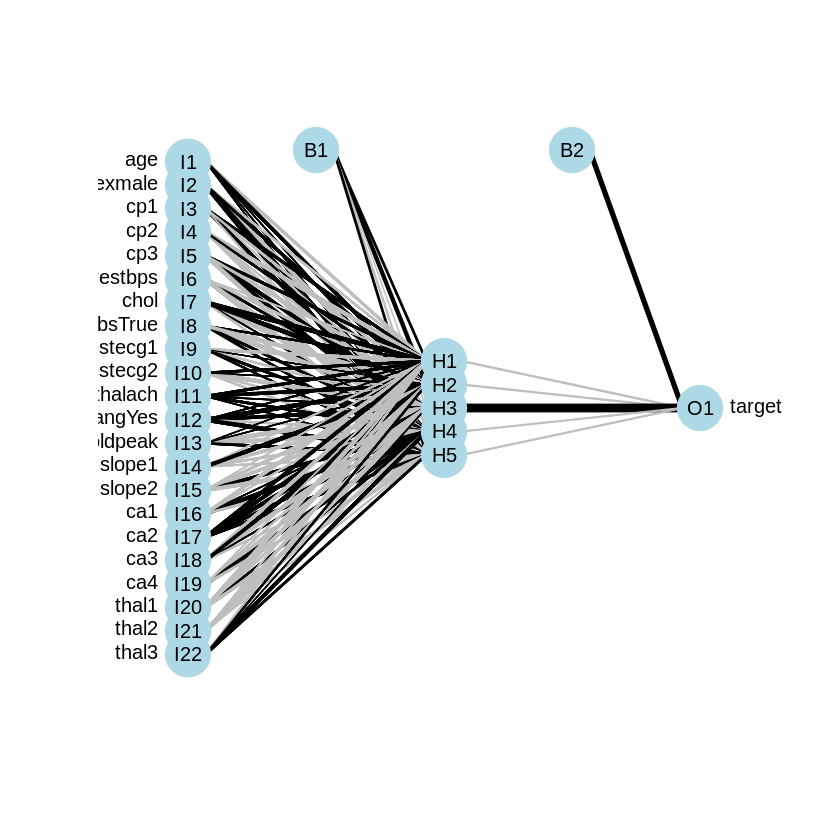

In [ ]:
library(nnet)#for neural netwrok model
library(NeuralNetTools)#for neural network plot
model.nn<-nnet(target~.,data = train_heart, size = 5 , maxit = 1000)
plotnet(model.nn)

In [ ]:
print('Neural Network Accuracy')
confusionMatrix(as.factor(predict(model.nn,newdata = test_heart, type = 'class')),test_heart$target)


[1] "Neural Network Accuracy"


Warning message in confusionMatrix.default(as.factor(predict(model.nn, newdata = test_heart, :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

            Reference
Prediction   Health Not Health
  Health          0          0
  Not Health     41         50
                                         
               Accuracy : 0.5495         
                 95% CI : (0.4416, 0.654)
    No Information Rate : 0.5495         
    P-Value [Acc > NIR] : 0.5433         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 4.185e-10      
                                         
            Sensitivity : 0.0000         
            Specificity : 1.0000         
         Pos Pred Value :    NaN         
         Neg Pred Value : 0.5495         
             Prevalence : 0.4505         
         Detection Rate : 0.0000         
   Detection Prevalence : 0.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : Health         
            

Support Vector Machine 


In [ ]:
data2<-read.csv("heart.csv")

In [ ]:
install.packages("e1071", repos="https://cran.rstudio.com/")
install.packages("pkList", repos="https://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘pkList’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library("e1071")


Attaching package: ‘e1071’


The following object is masked from ‘package:gtools’:

    permutations




In [ ]:
#We’ll be using the training set specifically for our model building and the testing set for evaluating the model:
intrain <- createDataPartition(y = data2$fbs, p= 0.7, list = FALSE)
training <- data2[intrain,]
testing <- data2[-intrain,]



In [ ]:
dim(training); 
dim(testing);

[1] 213  14

[1] 90 14

In [ ]:
anyNA(data2)

[1] FALSE

In [ ]:
summary(data2)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [ ]:
training[["fbs"]] = factor(training[["fbs"]])

In [ ]:
##Before we train our model, we’ll first implement the trainControl() method. This will control all the computational overheads so that we can use the train() function provided by the caret package. The training method will train our data on different algorithms.

#First, let’s focus on the traincontrol() method:

trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [ ]:
svm_Linear <- svm(fbs ~ ., data=training)
summary(svm_Linear)


Call:
svm(formula = fbs ~ ., data = training)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  105

 ( 32 73 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

5  10  12  17  18  23  30  31  32  34  35  37  46  48  52  53  54  56  57  61 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 68  73  75  79  88  89  90  92  96  98 104 106 113 114 118 133 135 136 138 143 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
144 145 146 148 151 156 157 159 166 168 169 170 172 177 178 179 180 182 184 186 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
191 196 201 206 213 214 219 221 223 237 242 243 245 247 249 251 252 265 267 269 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
274 278 283 287 289 291 292 297 299 302 
  0   0   0   0   0   0   0   0   0   0 
Levels: 0 1

In [ ]:
confusionMatrix(table(test_pred, testing$fbs))

Confusion Matrix and Statistics

         
test_pred  0  1
        0 77 13
        1  0  0
                                          
               Accuracy : 0.8556          
                 95% CI : (0.7657, 0.9208)
    No Information Rate : 0.8556          
    P-Value [Acc > NIR] : 0.5732676       
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.0008741       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8556          
         Neg Pred Value :    NaN          
             Prevalence : 0.8556          
         Detection Rate : 0.8556          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                                          

K Nearest Neighbour  - Data Wrangling


In [ ]:
# Create dummy variable

dummy <- dummyVars("~target + sex +cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal", data = heart)

# Create new data frame

dummy <- data.frame(predict(dummy, newdata = heart))

# Check our data frame structure

str(dummy)

'data.frame':	303 obs. of  31 variables:
 $ target.Health    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ target.Not.Health: num  1 1 1 1 1 1 1 1 1 1 ...
 $ sex.female       : num  0 0 1 0 1 0 1 0 0 0 ...
 $ sex.male         : num  1 1 0 1 0 1 0 1 1 1 ...
 $ cp.0             : num  0 0 0 0 1 1 0 0 0 0 ...
 $ cp.1             : num  0 0 1 1 0 0 1 1 0 0 ...
 $ cp.2             : num  0 1 0 0 0 0 0 0 1 1 ...
 $ cp.3             : num  1 0 0 0 0 0 0 0 0 0 ...
 $ trestbps         : num  145 130 130 120 120 140 140 120 172 150 ...
 $ chol             : num  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs.False        : num  0 1 1 1 1 1 1 1 0 1 ...
 $ fbs.True         : num  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg.0        : num  1 0 1 0 0 0 1 0 0 0 ...
 $ restecg.1        : num  0 1 0 1 1 1 0 1 1 1 ...
 $ restecg.2        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ thalach          : num  150 187 172 178 163 148 153 173 162 174 ...
 $ exang.No         : num  1 1 1 1 0 1 1 1 1 1 ...
 $ exang.Yes        : num  0 0 0

In [ ]:
dummy$target.Health <- NULL
dummy$sex.female <- NULL
dummy$fbs.False <- NULL
dummy$exang.No <- NULL

In [ ]:
head(dummy, 3)

,target.Not.Health,sex.male,cp.0,cp.1,cp.2,cp.3,trestbps,chol,fbs.True,restecg.0,⋯,slope.2,ca.0,ca.1,ca.2,ca.3,ca.4,thal.0,thal.1,thal.2,thal.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,0,0,1,145,233,1,1,⋯,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,130,250,0,0,⋯,0,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,130,204,0,1,⋯,1,1,0,0,0,0,0,0,1,0


Cross Validation: K - Nearest Method

In [ ]:
set.seed(100)

# Predictor

train_x <- dummy[index, -1]
test_x <- dummy[-index, -1]

# Target

train_y <- dummy[index, 1]
test_y <- dummy[-index, 1]

CHoose K

In [ ]:
sqrt(nrow(train_x))

[1] 14.56022

Scaling

In [ ]:
train_x <- scale(x = train_x)
test_x <- scale(x = test_x, center = attr(train_x, "scaled:center"), scale = attr(train_x, "scaled:scale"))

Prediction

In [ ]:
pred_knn <- knn(train = train_x, test = test_x, cl = train_y, k = 14)

In [ ]:
pred_knn <- pred_knn %>%
  as.data.frame() %>%
  mutate(pred_knn = factor(pred_knn, levels = c(0,1), labels = c("Health", "Not Health"))) %>%
  select(pred_knn)

In [ ]:
test_y <- test_y %>%
  as.data.frame() %>%
  mutate(target = factor(test_y, levels = c(0,1), labels = c("Health", "Not Health"))) %>%
  select(target)

Confusion matrix of KNN prediction

In [ ]:
conf_mat_knn <- confusionMatrix(pred_knn$pred_knn, reference = test_y$target, positive = "Not Health")

conf_mat_knn

Confusion Matrix and Statistics

            Reference
Prediction   Health Not Health
  Health         29          2
  Not Health     12         48
                                          
               Accuracy : 0.8462          
                 95% CI : (0.7554, 0.9133)
    No Information Rate : 0.5495          
    P-Value [Acc > NIR] : 1.82e-09        
                                          
                  Kappa : 0.6823          
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.9600          
            Specificity : 0.7073          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.9355          
             Prevalence : 0.5495          
         Detection Rate : 0.5275          
   Detection Prevalence : 0.6593          
      Balanced Accuracy : 0.8337          
                                          
       'Positive' Class : Not Healt

In [ ]:
recall_knn <- round(48/(48+2),3)
specificity_knn <- round(29/(29+12),3)
precision_knn <- round(48/(48+12),3)
accuracy_knn <- round((48+29)/(48+29+12+2),3)

matrix_knn <- cbind.data.frame(accuracy_knn, recall_knn, specificity_knn, precision_knn)

matrix_knn

accuracy_knn,recall_knn,specificity_knn,precision_knn
<dbl>,<dbl>,<dbl>,<dbl>
0.846,0.96,0.707,0.8
